### 1. Data Loading and Initial Exploration
Before conducting any analysis, it is essential to load the dataset and perform an initial inspection to understand its structure. This step helps us verify that the data is clean, formatted correctly, and ready for further processing.

In [ ]:
# Import necessary libraries  

import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a Pandas DataFrame  
data = pd.read_csv('medical_insurance.csv')

# Display a random sample of 10 records from the dataset  
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
245,54,male,30.020,0,no,northwest,24476.47851
483,51,female,39.500,1,no,southwest,9880.06800
2484,52,female,30.875,0,no,northeast,23045.56616
1103,58,male,36.080,0,no,southeast,11363.28320
2648,41,female,28.050,1,no,southeast,6770.19250
2305,35,female,34.210,1,no,southeast,5245.22690
2580,31,female,21.755,0,no,northwest,4134.08245
984,20,male,30.115,5,no,northeast,4915.05985
2220,36,male,33.820,1,no,northwest,5377.45780
961,29,female,25.900,0,no,southwest,3353.28400


After loading the data, we need to examine its structure and key statistics. This helps us determine data types, check for missing values, and identify potential trends or outliers in the dataset.

In [3]:
# Get basic information about the dataset (columns, data types, missing values) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


The dataset contains 2772 entries  across 7 columns, providing demographic and insurance cost data, including age, BMI, number of children, smoker status, region, and charges.

In [4]:
# Generate summary statistics for numerical columns  
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<ul>
<li>Age & BMI Impact Costs: Older individuals and those with a higher BMI (mean: 30.7) may face increased insurance charges.</li>
<li>High Cost Variability: Charges range from $1,121 to $63,770, with a high standard deviation ($12,151.76), indicating significant cost differences.</li>
<li>Obesity Prevalence: 75% of individuals have a BMI above 26.22, suggesting potential health risks that insurers should consider.</li>
<li>Children & Dependents: Most policyholders have 0 to 2 children, impacting family-based insurance plans.</li>
<li>Need for Risk-Based Pricing: The large spread in charges suggests cost variations.</li>
</ul>

In [5]:
# Check for missing values in each column  
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<b>The output of data.isnull().sum() confirms that there are no missing values in the dataset. Each column (age, sex, bmi, children, smoker, region, charges) has a count of zero missing entries.</b> \
No data imputation required: Since the dataset is complete, we can proceed with analysis without worrying about filling in missing values

### 2. Data Preparation

Before performing any analysis or building predictive models, it is crucial to prepare and preprocess the data. This step ensures that the dataset is clean, well-structured, and ready for further exploration.

##### Data Copy and Initial Exploration
Before modifying the dataset, it is good practice to create a copy to preserve the original data. This ensures we can always refer back to the original dataset if needed. Additionally, we inspect the first few rows to understand its structure.

In [6]:
# Creating a copy of the dataset to preserve the original data
data_copy = data.copy()

# Displaying the first few rows to understand the dataset structure
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Converting Categorical Variables to Numeric
Many machine learning models require numerical data. Thus, categorical variables (sex, smoker, region) need to be transformed into numerical values.

In [7]:
# Defining a mapping dictionary to convert categorical data to numeric values
categ_to_num = {'sex': {'male' : 0 , 'female' : 1},
              'smoker': {'no': 0 , 'yes' : 1},
              'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
             }

# Replacing categorical values with corresponding numerical values
data_copy.replace(categ_to_num, inplace = True)

<ipython-input-7-260ac1cc4f96>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(categ_to_num, inplace = True)


In [8]:
# Checking the dataset structure after transformation
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


#### Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset before building models. It helps in identifying patterns, correlations, outliers, and distributions of variables. Below are the key EDA steps performed on the dataset.

##### Analyzing Correlations Between Variables
A correlation heatmap helps us understand the relationships between different features in the dataset. Strong correlations suggest potential dependencies between variables.

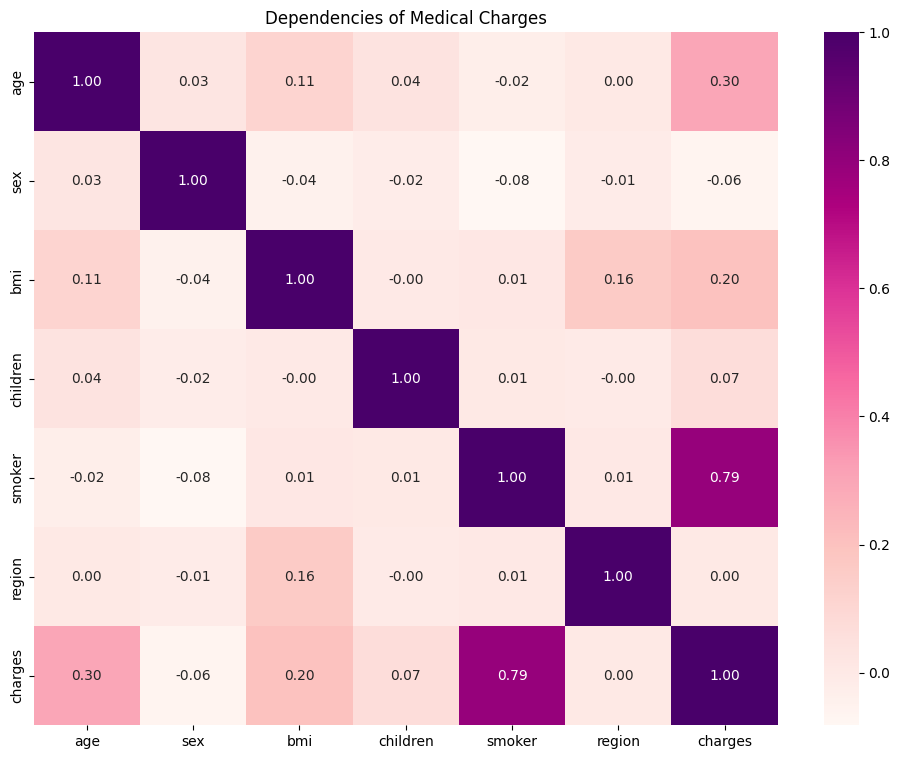

In [9]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, cmap='RdPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('Cor')
plt.show()

Observations from the Heatmap:
<ul>
<li>charges has a strong positive correlation with smoker (i.e., smokers pay significantly higher insurance charges).</li>
<li>bmi and charges show a moderate positive correlation, indicating that individuals with higher BMI tend to have higher insurance costs.</li>
<li>age also has a positive correlation with charges, meaning older individuals generally have higher medical expenses.</li>
<li>region and children have weak correlations with charges, suggesting they have minimal influence on insurance costs.</li>
</ul>

##### Analyzing Distribution of Categorical Variables
We analyze how categorical features (sex, smoker, region) are distributed in the dataset.

Counting occurrences of each category

In [ ]:
print(data['sex'].value_counts().sort_values())

sex
female    1366
male      1406
Name: count, dtype: int64


In [11]:
print(data['smoker'].value_counts().sort_values())

smoker
yes     564
no     2208
Name: count, dtype: int64


In [12]:
print(data['region'].value_counts().sort_values())

region
northeast    658
northwest    664
southwest    684
southeast    766
Name: count, dtype: int64


### Visualizing the Relationship Between Features and Charges
To better understand the impact of different variables on charges, we use various plots like bar plots and scatter plots.

This plot shows how insurance charges vary with age.\
<b>Medical charges tend to increase with age.
There may be a sharp rise in insurance costs for older individuals due to increased health risks.</b>


<ipython-input-13-0136df223a62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='charges', data=data_copy, palette='RdPu')


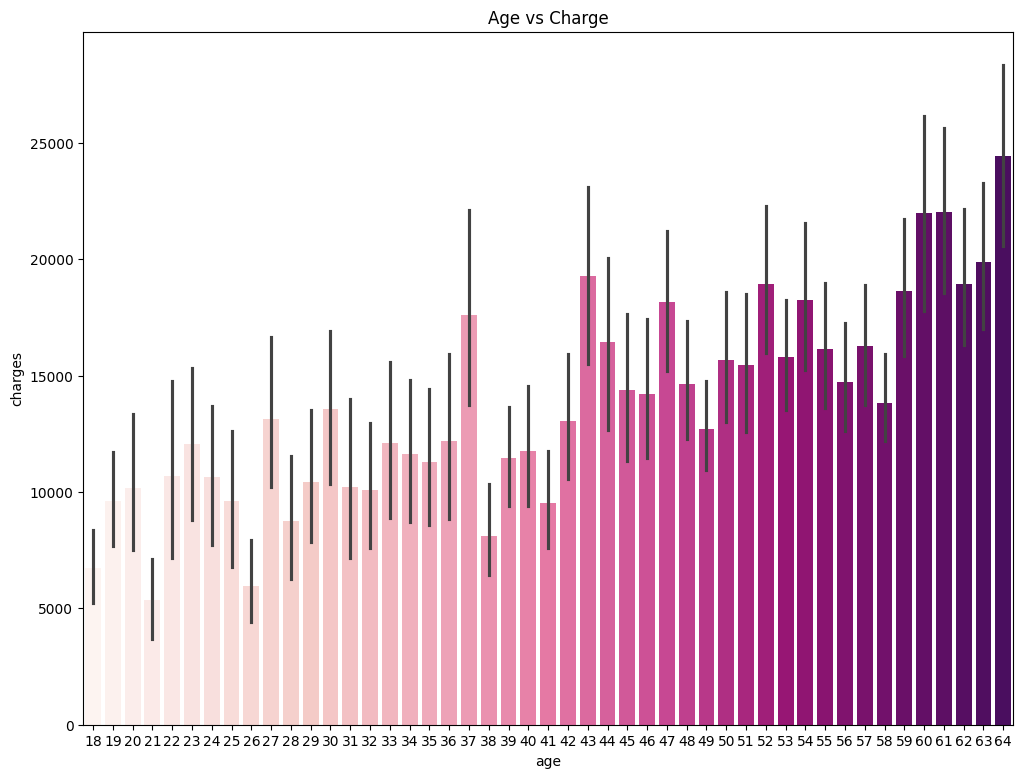

In [13]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=data_copy, palette='RdPu')
plt.savefig('AgevsCharges')

This plot examines whether an individual’s region impacts their medical costs.\
<b>There is no significant difference in insurance charges across regions.
This suggests that location does not heavily influence medical expenses</b>


<ipython-input-14-f25b948dba95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='RdPu')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

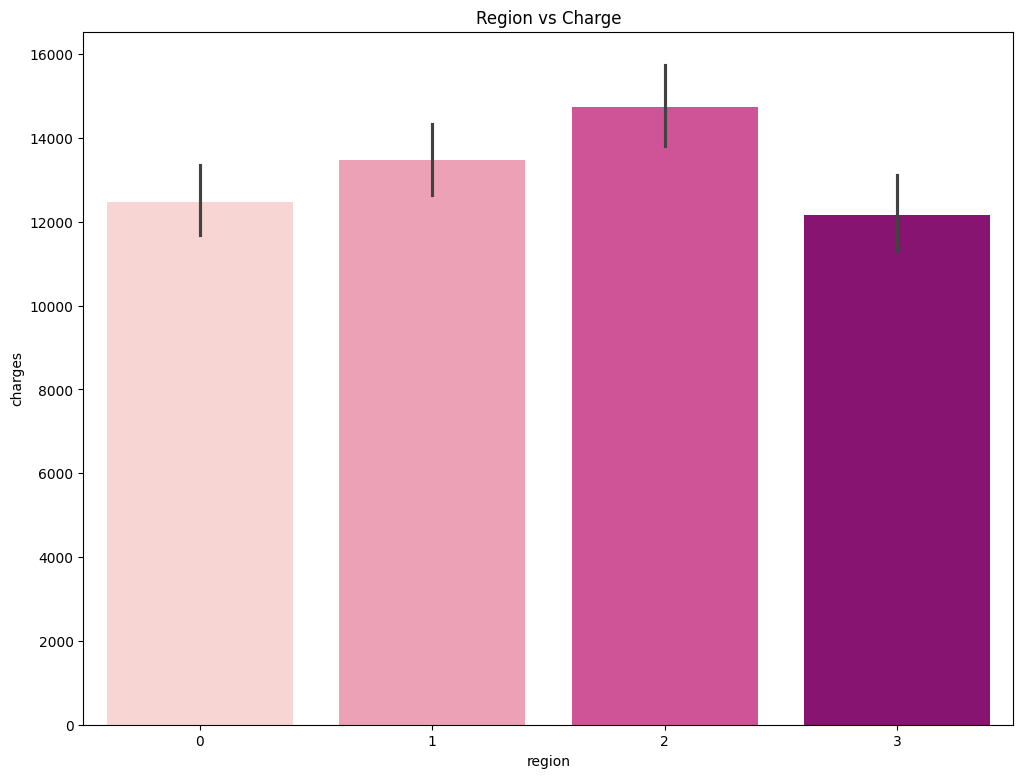

In [14]:
plt.figure(figsize=(12,9))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='RdPu')

We visualize how BMI affects insurance costs, distinguishing by gender.\
<b>Higher BMI values tend to be associated with higher charges.
There seems to be a pattern where individuals with a BMI above 30 (obese category) have significantly higher charges.
Gender does not seem to have a significant impact on this relationship.</b>


Text(0.5, 1.0, 'BMI VS Charge')

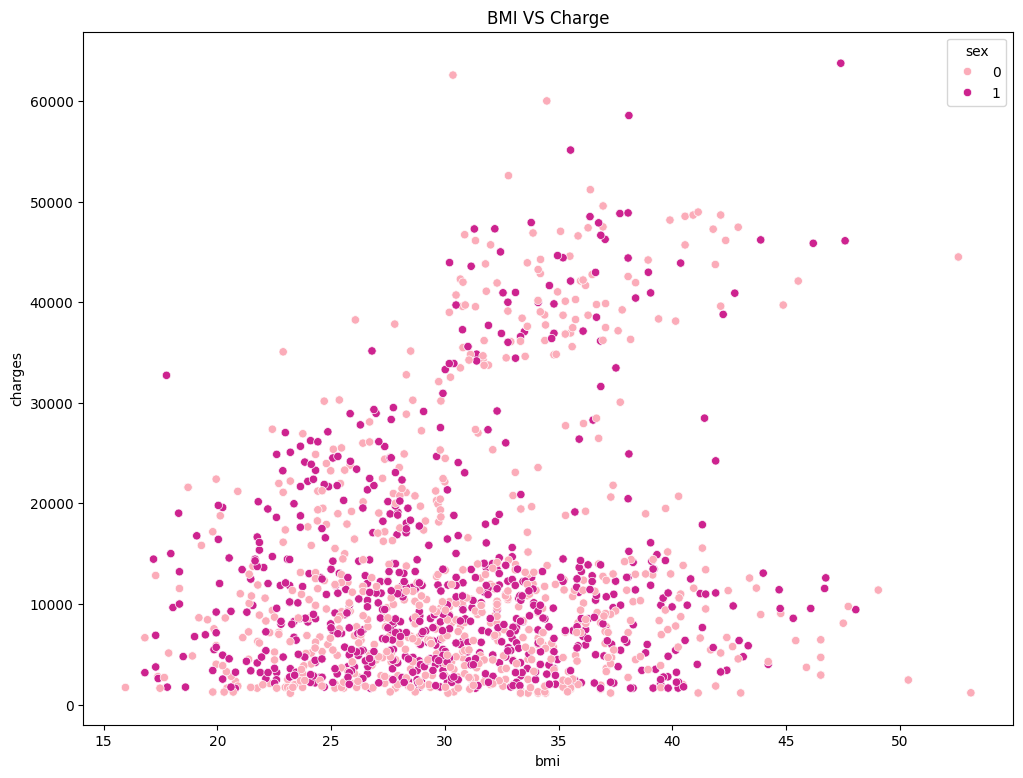

In [15]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy, palette='RdPu')
plt.title('BMI VS Charge')

Smoking status is one of the most important predictors of insurance costs.\
<b>Smokers have dramatically higher medical charges than non-smokers.
The impact of smoking on charges is significant for both males and females.<b>

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

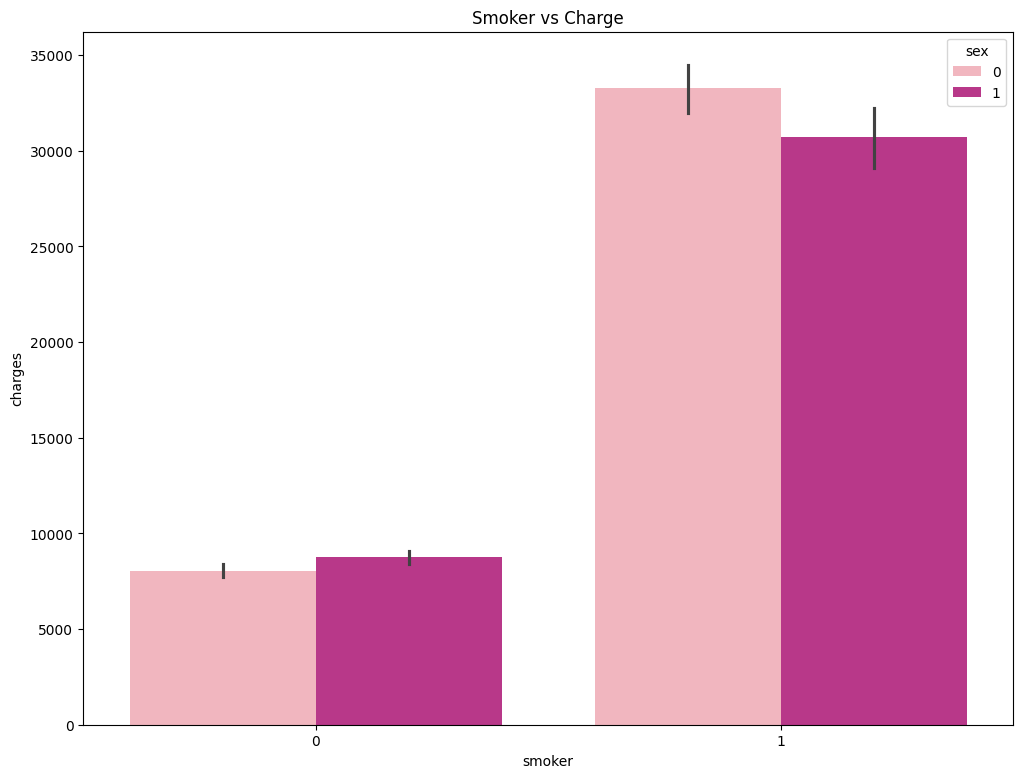

In [16]:
plt.figure(figsize=(12,9))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='RdPu',hue='sex')

We analyze whether men or women pay more for medical insurance.\
<b>The difference in medical costs between men and women is not significant.
Gender alone is not a strong predictor of insurance charges.</b>

<ipython-input-17-eed6d4677fec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='RdPu')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

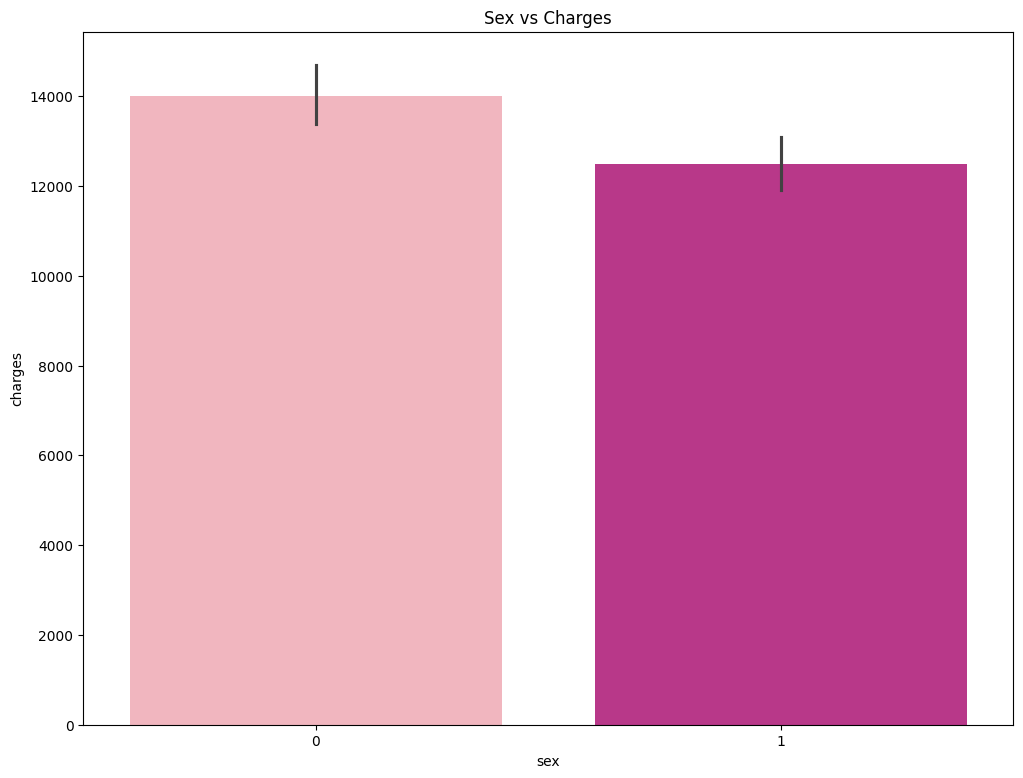

In [17]:
plt.figure(figsize=(12,9))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='RdPu')

### Final Conclusions 
Smoking is the biggest factor affecting medical insurance charges – smokers pay significantly more than non-smokers.\
Age is positively correlated with higher charges, indicating older individuals face higher medical costs.\
BMI influences medical expenses, especially for obese individuals.\
Region does not significantly impact charges, suggesting that geographical location does not play a major role in determining medical insurance costs.\
Gender does not have a significant impact, meaning men and women pay nearly the same on average.\

### Splitting the Dataset into Training and Testing Sets

To build and evaluate predictive models effectively, it's crucial to split the dataset into training and testing sets. This allows us to train the model on one portion of the data and evaluate its performance on unseen data. In this case, we will split the dataset into 80% training and 20% testing.

In [ ]:
#import necessary libraries 
from sklearn.model_selection import train_test_split

In [19]:
# Defining Features and Target Variable

from sklearn.model_selection import train_test_split

X = data_copy.drop('charges', axis=1)
y = data_copy['charges']

#split the dataset into training and testing sets using an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#view the first few rows of the training set (X_train) to ensure the split was done correctly.
X_train.head()

,age,sex,bmi,children,smoker,region
1864,21,0,36.85,0,0,2
1997,38,1,34.80,2,0,3
1336,21,1,25.80,0,0,3
655,52,1,25.30,2,1,2
261,20,1,26.84,1,1,2


In [21]:
#view the first few values of the target variable 
(y_train).y_train.head()

,charges
1864,1534.3045
1997,6571.5440
1336,2007.9450
655,24667.4190
261,17085.2676


In [22]:
#save the test data (X_test) to a CSV file for later use.
test_data = X_test.to_csv("test_data.csv", index=False)

In [23]:
#inspect the first few rows of the test data (X_test).
X_test.head()

,age,sex,bmi,children,smoker,region
1106,49,1,29.925,0,0,0
1321,62,0,26.695,0,1,1
2313,57,1,20.100,1,0,3
2274,22,0,39.500,0,0,3
1432,18,1,38.665,2,0,1


In [24]:
#check the target variable (y_test) for the test set.
y_test.head()

,charges
1106,8988.15875
1321,28101.33305
2313,12032.32600
2274,1682.59700
1432,3393.35635


#### Summary
The dataset is split into 80% training data and 20% testing data using train_test_split.\
The training data (X_train, y_train) will be used to train the model, while the testing data (X_test, y_test) will be used to evaluate the model's performance.\
We also saved the test data into a CSV file for further reference.\

### Preprocessing

The preprocessing pipeline ensures the dataset is properly formatted for machine learning. It applies One-Hot Encoding for categorical variables, Standard Scaling for numerical features, and correctly handles binary features. The ColumnTransformer efficiently applies these transformations while preventing data leakage. 

In [25]:
#Import Required Libraries

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

#Initialize the One-Hot Encoder
encoder = OneHotEncoder()

In [26]:
#Check the Distribution of 'children' Column
X_test['children'].value_counts()

,count
children,
0,244
1,126
2,107
3,58
5,11
4,9


The output shows how many people in X_test have 0, 1, 2, 3, 4, or 5 children.

In [27]:
numerical_columns = ['age','children', 'bmi']
numerical_pipeline = make_pipeline(StandardScaler())

In [28]:
categorical_columns = ['region']
categorical_pipeline = make_pipeline(OneHotEncoder())

In [29]:
to_pass = ['sex','smoker']

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ('pass', 'passthrough', to_pass)
    ]
)

In [31]:
X_train_transformed = preprocessor.fit_transform(X_train)
print("Transformed train features shape:", X_train_transformed.shape)

Transformed train features shape: (2217, 9)


In [32]:
X_test_transformed = preprocessor.transform(X_test)
print("Transformed test features shape:", X_test_transformed.shape)

Transformed test features shape: (555, 9)


In [33]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
print("y_train shape:", y_train.shape)

y_train shape: (2217,)


In [34]:
print("X_train_transformed type:", type(X_train_transformed))
print("X_train_transformed type:", type(X_train_transformed))

if hasattr(X_train_transformed, 'shape'):
    print("X_train_transformed shape:", X_train_transformed.shape)

print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)

X_train_transformed type: <class 'numpy.ndarray'>
X_train_transformed type: <class 'numpy.ndarray'>
X_train_transformed shape: (2217, 9)
y_train type: <class 'numpy.ndarray'>
y_train shape: (2217,)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return (f"R² Score: {r2}\nRMSE: {rmse}\nMAE: {mae}")

In [36]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [37]:
model1.fit(X_train_transformed, y_train)

LinearRegression()

In [38]:
y_pred = model1.predict(X_test_transformed)

In [39]:
print(evaluate_model(y_test, y_pred))

R² Score: 0.7398166177564298
RMSE: 6319.271678607551
MAE: 4160.247974762997


In [40]:
y_test_mock = y_test.copy()
y_test_mock.iloc[0] = 1_000_000
print(evaluate_model(y_test_mock, y_pred))

R² Score: 0.053323173854687655
RMSE: 42479.552641897644
MAE: 5940.831338814401


In [41]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
comparison_df.head()

,Actual,Predicted,Difference
1106,8988.15875,10382.195851,-1394.037101
1321,28101.33305,36850.703702,-8749.370652
2313,12032.32600,9010.642378,3021.683622
2274,1682.59700,5910.228930,-4227.631930
1432,3393.35635,6661.467930,-3268.111580


In [42]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [43]:
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred = model2.predict(X_test)

In [45]:
print(evaluate_model(y_test, y_pred))

R² Score: 0.9509946653491352
RMSE: 2742.5144792595984
MAE: 1280.4140463725769


In [46]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
comparison_df.head()

,Actual,Predicted,Difference
1106,8988.15875,9871.719813,-883.561063
1321,28101.33305,28251.212836,-149.879786
2313,12032.32600,12378.668618,-346.342618
2274,1682.59700,2034.159166,-351.562166
1432,3393.35635,4376.058654,-982.702304


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

model3 = GradientBoostingRegressor(random_state=42)

In [48]:
param_grid = {
    'n_estimators': [i for i in range(100, 1001, 100)],
    'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 1.0],
}

In [49]:
random_search = RandomizedSearchCV(estimator=model3, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

In [50]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.02, 0.03, 0.05,
                                                          0.07, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42)

In [52]:
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.1}


In [53]:
y_pred_gb = random_search.best_estimator_.predict(X_test)

In [54]:
print(evaluate_model(y_test, y_pred_gb))

R² Score: 0.9610162498076097
RMSE: 2446.0709911695176
MAE: 695.4409347310996


In [55]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
comparison_df.head()

,Actual,Predicted,Difference
1106,8988.15875,9871.719813,-883.561063
1321,28101.33305,28251.212836,-149.879786
2313,12032.32600,12378.668618,-346.342618
2274,1682.59700,2034.159166,-351.562166
1432,3393.35635,4376.058654,-982.702304


In [56]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
X_train['region'] = X_train["region"].astype("category")

In [58]:
X_train['region']

,region
1864,2
1997,3
1336,3
655,2
261,2
...,...
1638,2
1095,1
1130,2
1294,1


In [59]:
param_grid = {
    'n_estimators': [i for i in range(100, 1001, 100)],
    'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

In [60]:
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True)

In [61]:
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.02, 0.03, 0.05,
                                                          0.07, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [62]:
print("Best Hyperparameters found: ", random_search.best_params_)

Best Hyperparameters found:  {'subsample': 0.7, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 11, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


In [63]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
best_model = xgb.XGBRegressor(
    **random_search.best_params_,
    objective='reg:squarederror', enable_categorical=True
)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = best_model.predict(X_test)
print(evaluate_model(y_test, y_pred))

R² Score: 0.9591442544275183
RMSE: 2504.1124049464393
MAE: 694.1755673564893


In [66]:
from sklearn.metrics import classification_report

In [67]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})

comparison_df.head()

,Actual,Predicted,Difference
1106,8988.15875,8988.590820,-0.432070
1321,28101.33305,28101.294922,0.038128
2313,12032.32600,12032.297852,0.028148
2274,1682.59700,1682.582642,0.014358
1432,3393.35635,3394.326416,-0.970066


In [68]:
np.abs(comparison_df['Difference']).median()

0.6291031250002561

In [69]:
np.abs(comparison_df['Difference'])

,Difference
1106,0.432070
1321,0.038128
2313,0.028148
2274,0.014358
1432,0.970066
...,...
930,0.003421
2610,0.832412
1700,1.177687
100,474.844680


In [70]:
percentiles = np.percentile(np.abs(comparison_df['Difference']), [10, 25, 50, 75, 80, 85, 90, 99])

In [71]:
list(percentiles)

[0.05578881250003179,
 0.18331875000012587,
 0.6291031250002561,
 2.2983509374994355,
 20.370686718750605,
 523.6008789062489,
 2154.5579831250006,
 12909.063597081264]

In [72]:
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_test)

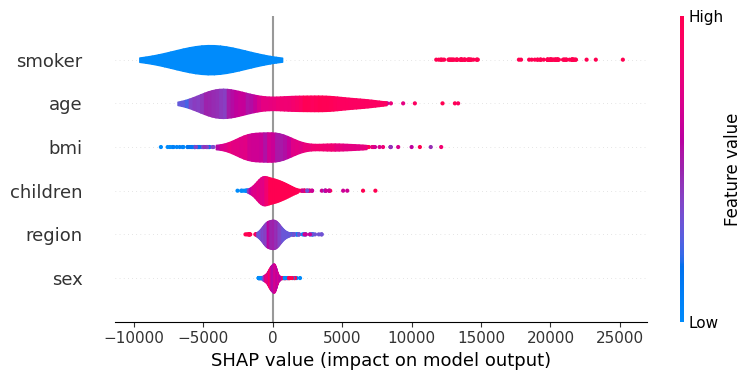

In [73]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

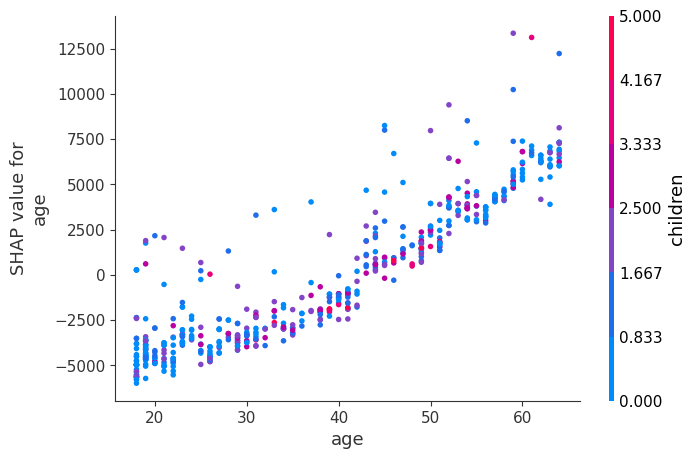

In [74]:
shap.dependence_plot('age', shap_values, X_test)

In [75]:
random_index = np.random.choice(X_test.index)
random_person = X_test.loc[random_index].values.reshape(1, -1)
random_person_dmatrix = xgb.DMatrix(random_person)
print(f'random index: {random_index}\nrandom person:\n{random_person}')

random index: 298
random person:
[[31.    0.   34.39  3.    1.    0.  ]]


In [76]:
predicted_cost = best_model.predict(random_person)
print(f"Predicted cost for the random person: {predicted_cost[0]}")

Predicted cost for the random person: 38745.84375


In [77]:
shap_values_for_person = explainer.shap_values(random_person_dmatrix)

In [78]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_for_person, random_person, feature_names=X_test.columns)

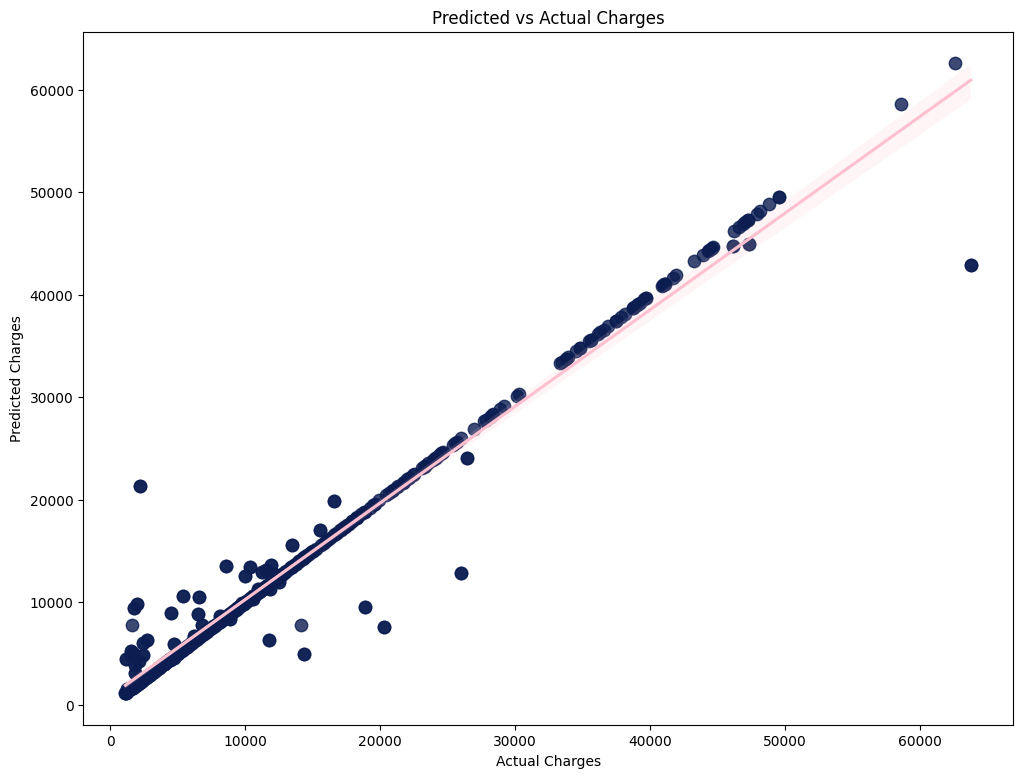

In [79]:
plt.figure(figsize=(12, 9))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 80, 'color': '#0B1D51'}, line_kws={'color': '#FFC1CF'})
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.show()